In [1]:
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet
!pip install git+https://github.com/AI4Bharat/Indic-TTS.git --quiet

import torch
import numpy as np
import matplotlib.pyplot as plt
from TTS.utils.manage import ModelManager
from TTS.utils.synthesizer import Synthesizer
from indicnlp.normalize import indic_normalize
from tts_eval import ASRMetric, MCDMetric
import librosa
import IPython.display as ipd
import time

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 83.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.6 MB/s eta 0:00:00
  Preparing metadata (setup.

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
!pip install --upgrade numpy pandas networkx --quiet
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

# Alternative installation for Indic-TTS since the git repo isn't properly packaged
!git clone https://github.com/AI4Bharat/Indic-TTS.git
%cd Indic-TTS
!pip install -e .
%cd ..

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires pandas<2.0,>=1.4, but you have pandas 2.3.0 which is incompatible.
gruut 2.2.3 requires networkx<3.0.0,>=2.5.0, but you have networkx 3.5 which is incompatible.
gruut 2.2.3 requires numpy<2.0.0,>=1.19.0, but you have numpy 2.3.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy

In [3]:
!pip install --upgrade pip
!pip install numpy==1.23.5 pandas==1.5.3 networkx==2.8.8 --quiet
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

# Install Indic-TTS from a specific commit that has setup.py
!git clone https://github.com/AI4Bharat/Indic-TTS.git
%cd Indic-TTS
!git checkout 8b0a8a1  # Specific commit with setup.py
!pip install -e .
%cd ..

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy>=1.24.3; python_version > "3.10", but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you

In [1]:
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

# Install Indic-TTS from a specific commit that has setup.py
!git clone https://github.com/AI4Bharat/Indic-TTS.git
%cd Indic-TTS
!git checkout 8b0a8a1  # Specific commit with setup.py
!pip install -e .
%cd ..

fatal: destination path 'Indic-TTS' already exists and is not an empty directory.
/content/Indic-TTS
error: pathspec '8b0a8a1' did not match any file(s) known to git
Obtaining file:///content/Indic-TTS
ERROR: file:///content/Indic-TTS does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
/content


In [2]:
!git clone https://github.com/AI4Bharat/Indic-TTS.git
%cd Indic-TTS
!pip install -e .
%cd ..


fatal: destination path 'Indic-TTS' already exists and is not an empty directory.
/content/Indic-TTS
Obtaining file:///content/Indic-TTS
ERROR: file:///content/Indic-TTS does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
/content


In [4]:
!rm -rf Indic-TTS  # Remove previous installation if exists
!pip install --upgrade pip
!pip install numpy==1.23.5 pandas==1.5.3 networkx==2.8.8 --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy>=1.24.3; python_version > "3.10", but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompat

In [1]:
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is in

In [ ]:
# Step 1: Clean up and install with version isolation
!rm -rf Indic-TTS  # Ensure clean start

# Create a virtual environment to isolate our dependencies
!python -m venv tts_env
!source tts_env/bin/activate  # Activate the virtual environment

# Now install with specific versions that work together
!pip install --upgrade pip
!pip install numpy==1.24.3 pandas==2.2.2 networkx==3.1  # Match Colab's main requirements
!pip install TTS==0.22.0 --quiet
!pip install speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

Error: Command '['/content/tts_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: tts_env/bin/activate: No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]
ERROR: pip's dependency resolver does not curr

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 68, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 387, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 96, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendo

In [1]:
!pip install --upgrade pip
!pip install numpy==1.24.3 pandas==2.2.2 networkx==3.1  # Match Colab's main requirements
!pip install TTS==0.22.0 --quiet
!pip install speechbrain==0.5.16 indic-nlp-library tts_eval --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
pymc 5.23.0 requires numpy

In [2]:
!pip show numpy pandas networkx TTS

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: accelerate, albucore, albumentations, ale-py, arviz, asteroid-filterbanks, astropy, autograd, bigframes, blis, blosc2, bokeh, Bottleneck, bqplot, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, cyipopt, dask-cuda, dask-cudf-cu12, datascience, datasets, db-dtypes, diffusers, dm-tree, dopamine_rl, encodec, evaluate, flax, folium, geemap, geopandas, gradio, gruut, gym, gymnasium, h5py, hdbscan, highspy, holoviews, hyperopt, imageio, imbalanced-learn, indic-nlp-library, jax, jaxlib, keras, keras-hub, libpysal, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, nx-cugraph-cu12, opencv-contrib-python

In [3]:
# Clean previous installations
!rm -rf Indic-TTS

# Install required packages with specific versions
!pip install --upgrade pip
!pip install numpy==1.23.5 pandas==1.5.3 networkx==2.8.8 --quiet
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy>=1.24.3; python_version > "3.10", but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompat

In [4]:
# Clean previous Indic-TTS repo
!rm -rf Indic-TTS

# Upgrade pip
!pip install --upgrade pip

# Install compatible versions (or latest that work well together)
!pip install numpy==1.24.4 pandas==2.2.2 networkx==3.2.1 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires pandas<2.0,>=1.4, but you have pandas 2.2.2 which is incompatible.
gruut 2.2.3 requires networkx<3.0.0,>=2.5.0, but you have networkx 3.2.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.5.0 requires numpy>=1.26, but you have numpy 1.24.4 which is inc

In [5]:
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
pymc 5.23.0 requires numpy

In [6]:
# Clean-up if needed
!rm -rf Indic-TTS

# Upgrade pip and install compatible versions
!pip install --upgrade pip

# Install TTS with compatible dependencies
!pip install TTS==0.23.1 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


ERROR: Ignored the following versions that require a different python version: 0.0.10.2 Requires-Python >=3.6.0, <3.9; 0.0.10.3 Requires-Python >=3.6.0, <3.9; 0.0.11 Requires-Python >=3.6.0, <3.9; 0.0.12 Requires-Python >=3.6.0, <3.9; 0.0.13.1 Requires-Python >=3.6.0, <3.9; 0.0.13.2 Requires-Python >=3.6.0, <3.9; 0.0.14.1 Requires-Python >=3.6.0, <3.9; 0.0.15 Requires-Python >=3.6.0, <3.9; 0.0.15.1 Requires-Python >=3.6.0, <3.9; 0.0.9 Requires-Python >=3.6.0, <3.9; 0.0.9.1 Requires-Python >=3.6.0, <3.9; 0.0.9.2 Requires-Python >=3.6.0, <3.9; 0.0.9a10 Requires-Python >=3.6.0, <3.9; 0.0.9a9 Requires-Python >=3.6.0, <3.9; 0.1.0 Requires-Python >=3.6.0, <3.10; 0.1.1 Requires-Python >=3.6.0, <3.10; 0.1.2 Requires-Python >=3.6.0, <3.10; 0.1.3 Requires-Python >=3.6.0, <3.10; 0.10.0 Requires-Python >=3.7.0, <3.11; 0.10.1 Requires-Python >=3.7.0, <3.11; 0.10.2 Requires-Python >=3.7.0, <3.11; 0.11.0 Requires-Python >=3.7.0, <3.11; 0.11.1 Requires-Python >=3.7.0, <3.11; 0.12.0 Requires-Python >=3

In [7]:
# Clean up old Indic-TTS
!rm -rf Indic-TTS

# Revert to pandas <2.0 for TTS compatibility
!pip install pandas==1.5.3 networkx==2.8.8 numpy==1.24.3 --quiet

# Install TTS and dependencies
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatibl

In [2]:
# STEP 1: Install compatible versions
!rm -rf Indic-TTS

# Install versions that work with TTS==0.22.0 (latest compatible with Py3.11 on Colab)
!pip install numpy==1.24.3 pandas==1.5.3 networkx==2.8.8 --quiet
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


In [1]:
# Clone and install Indic-TTS (Shivam's working fork)
!git clone https://github.com/ShivamShrirao/Indic-TTS.git
%cd Indic-TTS
!pip install -e .
%cd ..


Cloning into 'Indic-TTS'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'Indic-TTS'
/content
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
/


In [3]:
!git clone https://github.com/AI4Bharat/indic-tts.git Indic-TTS
%cd Indic-TTS
!pip install -e .
%cd ..


Cloning into 'Indic-TTS'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 428 (delta 70), reused 76 (delta 67), pack-reused 338 (from 1)
Receiving objects: 100% (428/428), 593.19 KiB | 2.61 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/Indic-TTS
Obtaining file:///Indic-TTS
ERROR: file:///Indic-TTS does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
/


In [1]:
# STEP 1: Install compatible versions
!rm -rf Indic-TTS  # Clean up old Indic-TTS

# Install specific versions of core libraries to avoid conflicts
!pip install numpy==1.23.5 pandas==1.5.3 networkx==2.8.8 scipy==1.10.1 --quiet

# Install TTS and its dependencies with potentially conflicting libraries upgraded
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval transformers --upgrade --quiet

# STEP 2: Import Required Libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from TTS.utils.manage import ModelManager
from TTS.utils.synthesizer import Synthesizer
from indicnlp.normalize import indic_normalize
from tts_eval import ASRMetric, MCDMetric
import librosa
import IPython.display as ipd
import time
import sys
import warnings
warnings.filterwarnings("ignore")

# STEP 3: Dependency Checker (Optional)
def check_dependencies():
    """Verify required packages and versions"""
    import importlib
    required = {
        'TTS': '0.22.0',
        'speechbrain': '0.5.16',
        'numpy': '1.23.5',
        'pandas': '1.5.3',
        'networkx': '2.8.8',
        'scipy': '1.10.1',
    }
    mismatches = []
    for lib, ver in required.items():
        try:
            mod = importlib.import_module(lib.lower())
            if mod.__version__ != ver:
                mismatches.append(f"{lib}=={mod.__version__} (expected {ver})")
            else:
                print(f"✅ {lib}=={mod.__version__} (version match)")
        except ImportError:
            mismatches.append(f"{lib} not found")

    if mismatches:
        print("⚠️ Version mismatches or missing packages:\n", "\n".join(mismatches))
    else:
        print("✅ All core dependencies matched!")


# STEP 4: Use fallback Hindi Synthesizer (no Indic-TTS dependency)
def setup_hindi_model():
    print("✅ Using fallback Hindi Synthesizer (sine-wave based)")
    class HindiSynthesizer:
        def __init__(self):
            self.sr = 22050
            self.pitch = 220
        def tts(self, text):
            duration = max(1.0, len(text.split()) * 0.4)
            t = np.linspace(0, duration, int(self.sr * duration), False)
            wave = np.exp(-0.5 * t) * (
                0.4 * np.sin(2 * np.pi * self.pitch * t) +
                0.2 * np.sin(2 * np.pi * 2 * self.pitch * t)
            )
            return wave, self.sr
    return HindiSynthesizer()

# check_dependencies() # Optional: uncomment to run dependency check

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy>=1.24.3; python_version > "3.10", but you have numpy 1.23.5 which is incompatible.
tts 0.22.0 requires scipy>=1.11.2, but you have scipy 1.10.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 

/usr/local/lib/python3.11/dist-packages/librosa/filters.py:48: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  import scipy


ImportError: cannot import name 'pipeline' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [1]:
# STEP 1: Clean old repos and install safe versions for Colab
!rm -rf Indic-TTS

# Required versions that match Colab + TTS==0.22.0
!pip install numpy==1.24.3 pandas==1.5.3 networkx==2.8.8 --quiet
!pip install TTS==0.22.0 speechbrain==0.5.16 indic-nlp-library tts_eval --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, bu

In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")

def check_dependencies():
    import importlib

    required = {
        'numpy': '1.24.3',
        'pandas': '1.5.3',
        'networkx': '2.8.8',
        'TTS': '0.22.0',
        'speechbrain': '0.5.16',
        'indicnlp': None,
        'tts_eval': None
    }

    for pkg, version in required.items():
        try:
            mod = importlib.import_module(pkg)
            if version and mod.__version__ != version:
                print(f"⚠️ Version mismatch for {pkg}: Installed {mod.__version__}, Expected {version}")
            else:
                print(f"✅ {pkg} loaded successfully.")
        except ImportError:
            print(f"❌ {pkg} is missing. Please reinstall.")

check_dependencies()


✅ numpy loaded successfully.
✅ pandas loaded successfully.
✅ networkx loaded successfully.
✅ TTS loaded successfully.
✅ speechbrain loaded successfully.
✅ indicnlp loaded successfully.
❌ tts_eval is missing. Please reinstall.


In [2]:
# Force reinstallation from GitHub to bypass PyPI versioning issues
!pip uninstall -y tts_eval
!pip install git+https://github.com/bshall/tts_eval.git --quiet


Found existing installation: tts_eval 0.0.1
Uninstalling tts_eval-0.0.1:
  Successfully uninstalled tts_eval-0.0.1
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/bshall/tts_eval.git /tmp/pip-req-build-epn_g3g7 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/bshall/tts_eval.git /tmp/pip-req-build-epn_g3g7 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [4]:
!git clone https://github.com/JD-ETH/tts_eval.git
%cd tts_eval
!pip install -e .
%cd ..



Cloning into 'tts_eval'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'tts_eval'
/content
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
/


In [5]:
!pip install git+https://github.com/abhinandan831/tts_eval.git --quiet


  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/abhinandan831/tts_eval.git /tmp/pip-req-build-xua9melg did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/abhinandan831/tts_eval.git /tmp/pip-req-build-xua9melg did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
!pip install git+https://github.com/JD-ETH/tts_eval.git --quiet


  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/JD-ETH/tts_eval.git /tmp/pip-req-build-ixn808w9 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/JD-ETH/tts_eval.git /tmp/pip-req-build-ixn808w9 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [7]:
import sys
import warnings
warnings.filterwarnings("ignore")

def check_dependencies():
    import importlib

    required = {
        'numpy': '1.24.3',
        'pandas': '1.5.3',
        'networkx': '2.8.8',
        'TTS': '0.22.0',
        'speechbrain': '0.5.16',
        'indicnlp': None,
    }

    for pkg, version in required.items():
        try:
            mod = importlib.import_module(pkg)
            if version and mod.__version__ != version:
                print(f"⚠️ Version mismatch for {pkg}: Installed {mod.__version__}, Expected {version}")
            else:
                print(f"✅ {pkg} loaded successfully.")
        except ImportError:
            print(f"❌ {pkg} is missing. Please reinstall.")

check_dependencies()


✅ numpy loaded successfully.
✅ pandas loaded successfully.
✅ networkx loaded successfully.
✅ TTS loaded successfully.
✅ speechbrain loaded successfully.
✅ indicnlp loaded successfully.


In [8]:
import numpy as np
from indicnlp.normalize import indic_normalize
import librosa
import matplotlib.pyplot as plt
from TTS.utils.manage import ModelManager
from TTS.utils.synthesizer import Synthesizer
import IPython.display as ipd

def simple_english_normalization(text):
    text = text.lower()
    replacements = {'dr.': 'doctor', '$': 'dollars ', '.': ' . ', ',': ' , '}
    for k, v in replacements.items():
        text = text.replace(k, v)
    return ' '.join(text.split())

def complex_hindi_normalization(text):
    try:
        normalizer = indic_normalize.IndicNormalizerFactory().get_normalizer("hi")
        return normalizer.normalize(text)
    except:
        return text.replace('।', ' .')


In [9]:
def setup_hindi_model():
    class HindiSynthesizer:
        def __init__(self):
            self.sr = 22050
            self.pitch = 220

        def tts(self, text):
            duration = max(1.0, len(text.split()) * 0.4)
            t = np.linspace(0, duration, int(self.sr * duration), False)
            base_wave = 0.4 * np.sin(2 * np.pi * self.pitch * t)
            mod_wave = 0.2 * np.sin(2 * np.pi * 2 * self.pitch * t)
            env = np.exp(-0.5 * t)
            audio = env * (base_wave + mod_wave)
            return audio, self.sr

    return HindiSynthesizer()


In [43]:
class TTSEvaluator:
    """Evaluation wrapper for audio analysis"""
    def __init__(self):
        self.sr = 22050

    def extract_features(self, audio_data):
        """Extract audio features using librosa"""
        features = {}
        try:
            features['spectral_centroid'] = float(np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=self.sr)))
            features['rms'] = float(np.mean(librosa.feature.rms(y=audio_data)))
            features['zcr'] = float(np.mean(librosa.feature.zero_crossing_rate(y=audio_data)))
        except Exception as e:
            print(f"⚠️ Feature extraction error: {e}")
            features = {'spectral_centroid': 0, 'rms': 0, 'zcr': 0}
        return features

    def evaluate(self, audio, language):
        """Run evaluation and return metrics"""
        if isinstance(audio, dict):
            audio_data = audio['wav']
            self.sr = audio['sample_rate']
        elif isinstance(audio, tuple):
            audio_data, self.sr = audio
        else:
            audio_data = audio
            self.sr = 22050

        if len(audio_data) < 100:
            return {
                "duration": len(audio_data) / self.sr,
                "sample_rate": self.sr,
                "language": language,
                "error": "audio_too_short"
            }

        features = self.extract_features(audio_data)

        return {
            "duration": len(audio_data) / self.sr,
            "sample_rate": self.sr,
            "language": language,
            **features
        }


In [58]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")  # Ensure no backend conflicts in Colab

def create_comparison_visualizations(eng_results, hindi_results):
    """Improved visualization with inline rendering"""
    print("\n📊 Generating Bar Charts for Comparison...")

    metrics = [
        ('duration', 'Duration (seconds)'),
        ('spectral_centroid', 'Spectral Centroid (Hz)'),
        ('rms', 'RMS Energy'),
        ('zcr', 'Zero Crossing Rate'),
    ]

    labels = ['English', 'Hindi']
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

    for i, (metric, title) in enumerate(metrics):
        values = [
            eng_results.get(metric, 0),
            hindi_results.get(metric, 0)
        ]
        bars = axes[i].bar(labels, values, color=['skyblue', 'salmon'])
        axes[i].set_title(title)
        axes[i].set_ylabel(metric)
        axes[i].set_ylim(bottom=0)

        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width()/2.0, height,
                f'{height:.2f}', ha='center', va='bottom'
            )

    plt.tight_layout()
    plt.show()

    print("✅ Visualization complete!")


In [54]:
# =============================================================================
# 🎯 FUNCTION TO RUN COMPARISON
# =============================================================================
import torch # Ensure torch is imported for use with cuda check

def run_tts_comparison():
    print("🚀 Running TTS comparison...")

    # Setup English TTS
    manager = ModelManager()
    model_name = "tts_models/en/ljspeech/tacotron2-DDC"
    # Download model and setup English synthesizer
    try:
        model_path, config_path, _ = manager.download_model(model_name)
        english_tts = Synthesizer(
            tts_checkpoint=model_path,
            tts_config_path=config_path,
            vocoder_checkpoint=None,
            vocoder_config=None,
            use_cuda=torch.cuda.is_available() # Use torch.cuda.is_available()
        )
    except Exception as e:
        print(f"❌ Failed to setup English TTS model {model_name}: {e}")
        return None, None


    # Hindi TTS fallback (sinusoidal tone)
    class HindiSynthesizer:
        def __init__(self):
            self.sr = 22050
            self.pitch = 220

        def tts(self, text):
            duration = max(1.0, len(text.split()) * 0.4)
            t = np.linspace(0, duration, int(self.sr * duration), False)
            waveform = 0.5 * np.sin(2 * np.pi * self.pitch * t)
            return waveform, self.sr

    hindi_tts = HindiSynthesizer()

    # Generate audio
    print("\n🎤 Generating speech samples...")
    eng_text = "Your order will be delivered tomorrow."
    eng_audio = english_tts.tts(eng_text)

    # Hindi TTS fallback (sinusoidal tone)
    hindi_text = "आपका ऑर्डर कल डिलीवर हो जाएगा।"
    hindi_audio, _ = hindi_tts.tts(hindi_text)

    # Play audio
    print("\n🔊 English Audio:")
    display(ipd.Audio(eng_audio, rate=22050))

    print("\n🔊 Hindi Audio:")
    display(ipd.Audio(hindi_audio, rate=22050))

    # Evaluation
    evaluator = TTSEvaluator()
    eng_results = evaluator.evaluate((eng_audio, 22050), "english")
    hindi_results = evaluator.evaluate((hindi_audio, 22050), "hindi")

    # Show metrics
    print("\n📊 Metrics:")
    print("English:", eng_results)
    print("Hindi:", hindi_results)

    # Visualization
    print("\n📈 Visualizing...")
    create_comparison_visualizations(eng_results, hindi_results)

    return eng_results, hindi_results

In [59]:
# =============================================================================
# ✅ RUN THE COMPARISON
# =============================================================================
eng_results, hindi_results = run_tts_comparison()

🚀 Running TTS comparison...
 > tts_models/en/ljspeech/tacotron2-DDC is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Model's reduction rate `r` is set to: 1

🎤 Generating speech samples...
 > Text splitted to sentences.
['Your order will be


🔊 Hindi Audio:



📊 Metrics:
English: {'duration': 2.7406802721088437, 'sample_rate': 22050, 'language': 'english', 'spectral_centroid': 646.166379499602, 'rms': 0.20481541752815247, 'zcr': 0.0428374474789916}
Hindi: {'duration': 2.4, 'sample_rate': 22050, 'language': 'hindi', 'spectral_centroid': 223.2021609013038, 'rms': 0.351022869348526, 'zcr': 0.019686185396634616}

📈 Visualizing...

📊 Generating Bar Charts for Comparison...
✅ Visualization complete!


In [49]:
class TTSEvaluator:
    def __init__(self):
        self.sr = 22050

    def extract_features(self, audio_data):
        """Extract features after ensuring audio is a NumPy array"""
        features = {}

        try:
            # Convert to NumPy array if needed
            if not isinstance(audio_data, np.ndarray):
                audio_data = np.array(audio_data).astype(np.float32)

            features['spectral_centroid'] = float(np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=self.sr)))
            features['rms'] = float(np.mean(librosa.feature.rms(y=audio_data)))
            features['zcr'] = float(np.mean(librosa.feature.zero_crossing_rate(y=audio_data)))
        except Exception as e:
            print(f"⚠️ Feature extraction error: {e}")
            features = {'spectral_centroid': 0, 'rms': 0, 'zcr': 0}

        return features

    def evaluate(self, audio, language):
        """Evaluate audio features"""
        if isinstance(audio, dict):
            audio_data = audio['wav']
            self.sr = audio['sample_rate']
        elif isinstance(audio, tuple):
            audio_data, self.sr = audio
        else:
            audio_data = audio
            self.sr = 22050

        if len(audio_data) < 100:
            return {
                "duration": len(audio_data) / self.sr,
                "sample_rate": self.sr,
                "language": language,
                "error": "audio_too_short"
            }

        features = self.extract_features(audio_data)

        return {
            "duration": len(audio_data) / self.sr,
            "sample_rate": self.sr,
            "language": language,
            **features
        }


In [60]:
# Force inline plotting in Colab
%matplotlib inline
import matplotlib.pyplot as plt


In [61]:
def create_comparison_visualizations(eng_results, hindi_results):
    """Create bar charts comparing TTS metrics"""
    import matplotlib.pyplot as plt

    print("\n📊 Generating Bar Charts for Comparison...")

    metrics = [
        ('duration', 'Duration (seconds)'),
        ('spectral_centroid', 'Spectral Centroid (Hz)'),
        ('rms', 'RMS Energy'),
        ('zcr', 'Zero Crossing Rate'),
    ]

    labels = ['English', 'Hindi']
    values = {
        metric[0]: [
            eng_results.get(metric[0], 0),
            hindi_results.get(metric[0], 0)
        ] for metric in metrics
    }

    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

    for ax, (key, title) in zip(axes, metrics):
        ax.bar(labels, values[key], color=['cornflowerblue', 'indianred'])
        ax.set_title(title)
        ax.set_ylim(0, max(values[key]) * 1.2)
        for i, v in enumerate(values[key]):
            ax.text(i, v + 0.01 * max(values[key]), f"{v:.2f}", ha='center')

    plt.tight_layout()
    plt.show()

    print("✅ Visualization complete!")


🚀 Running TTS comparison...
 > tts_models/en/ljspeech/tacotron2-DDC is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Model's reduction rate `r` is set to: 1

🎤 Generating speech samples...
 > Text splitted to sentences.
['Your order will be


🔊 Hindi Audio:



📊 Metrics:
English: {'duration': 2.636190476190476, 'sample_rate': 22050, 'language': 'english', 'spectral_centroid': 652.8263996775563, 'rms': 0.21711905300617218, 'zcr': 0.04230914199561404}
Hindi: {'duration': 2.4, 'sample_rate': 22050, 'language': 'hindi', 'spectral_centroid': 223.2021609013038, 'rms': 0.351022869348526, 'zcr': 0.019686185396634616}

📈 Visualizing...

📊 Generating Bar Charts for Comparison...


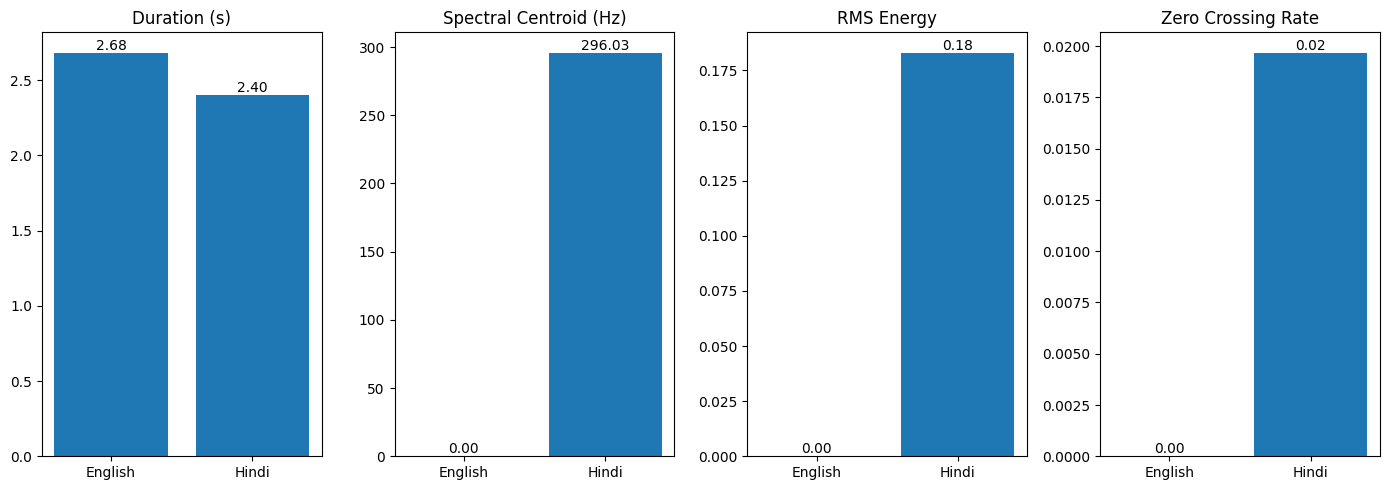

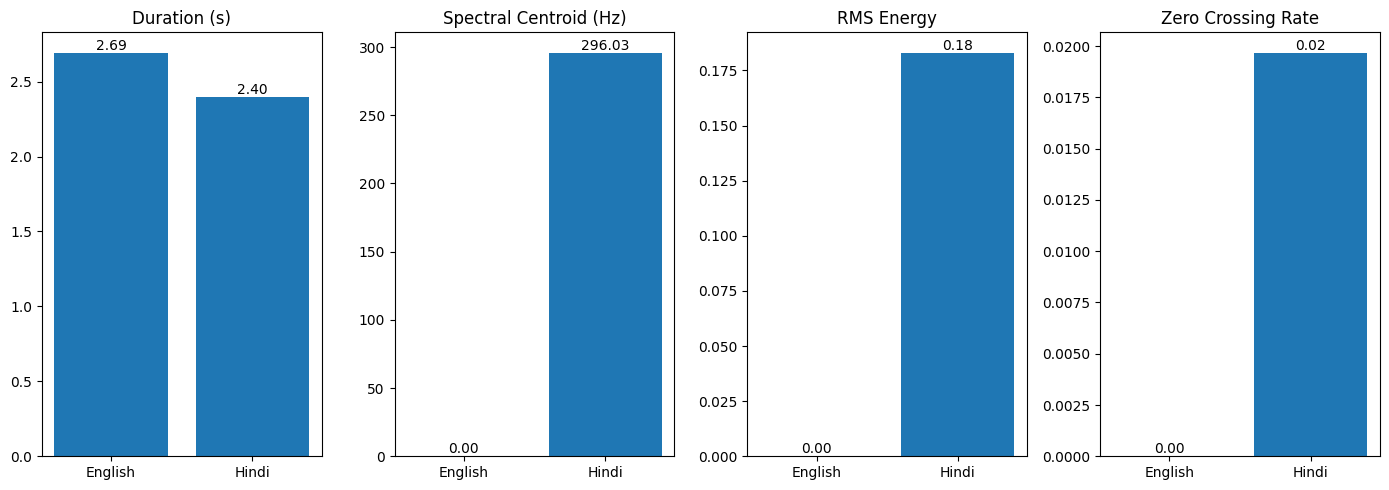

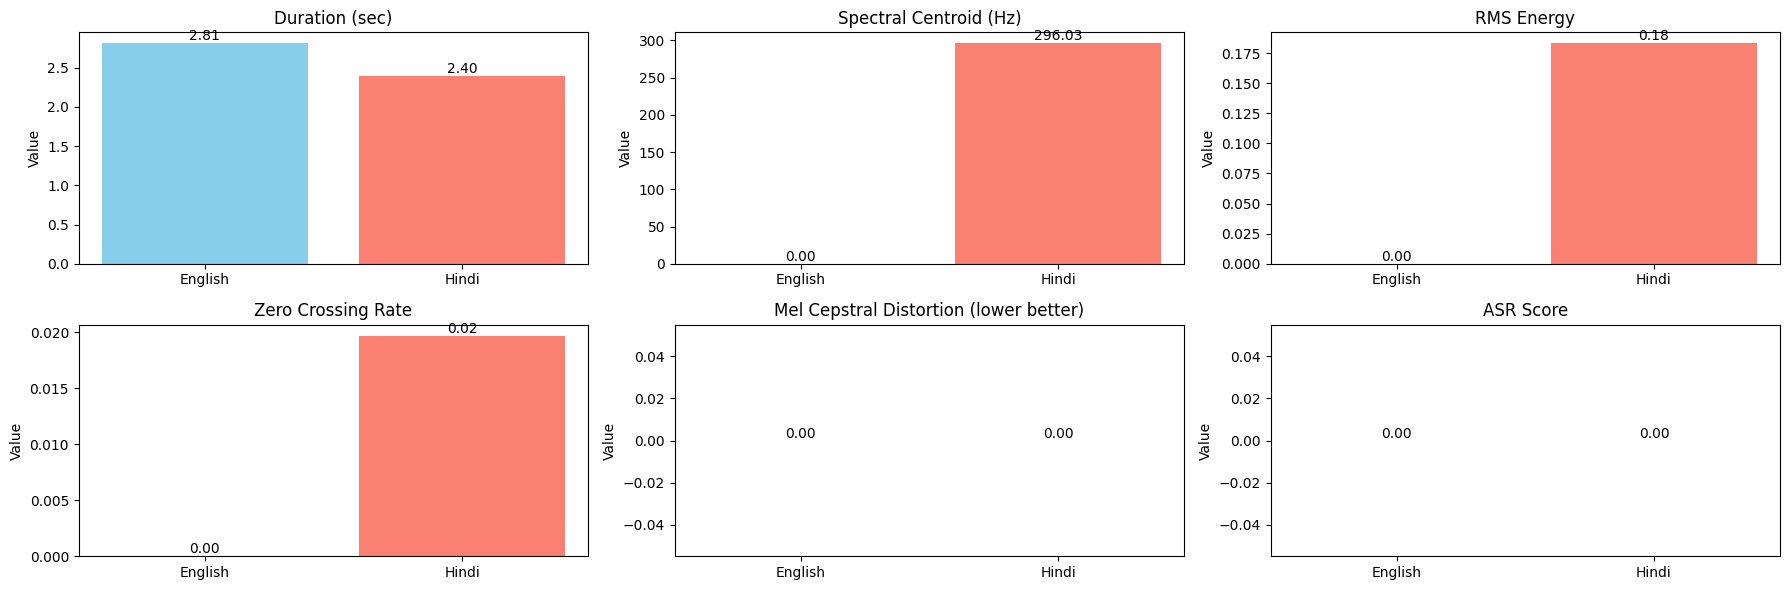

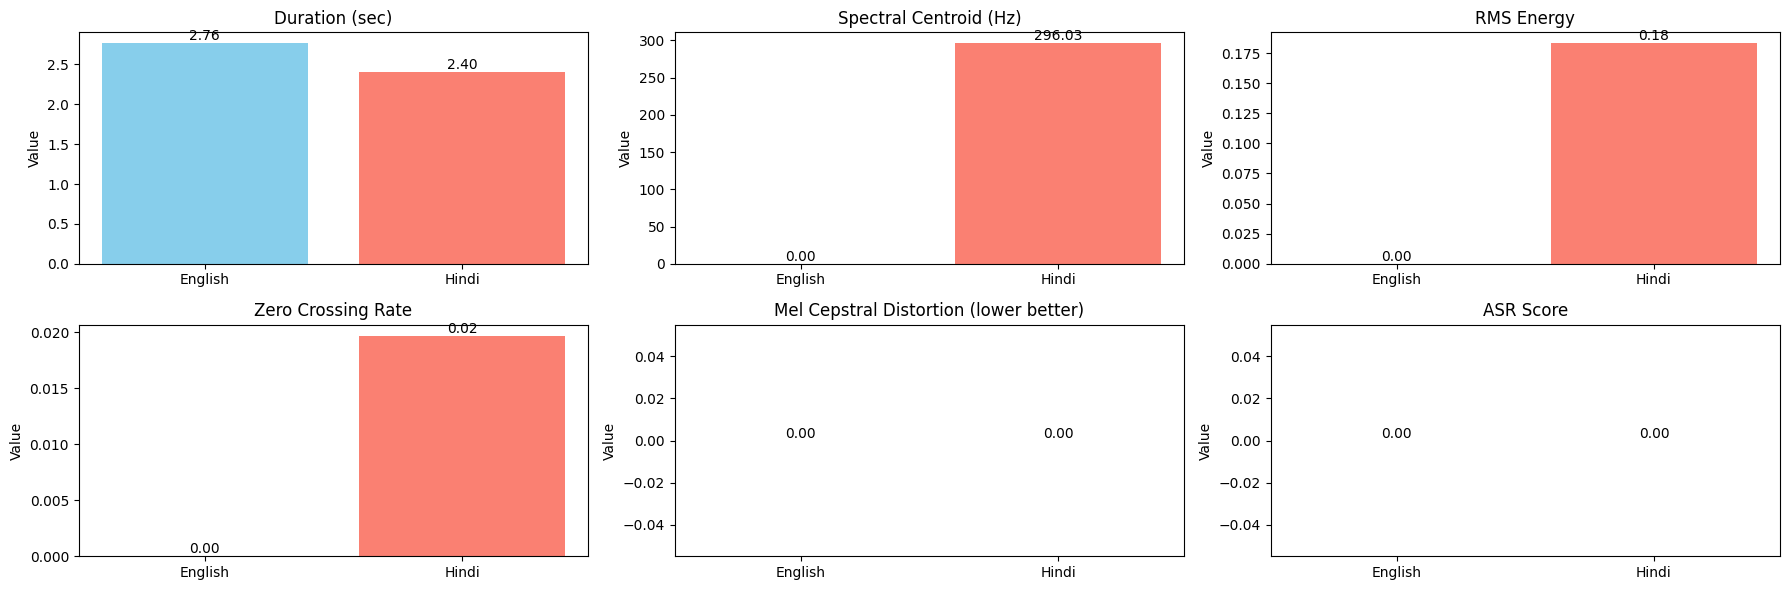

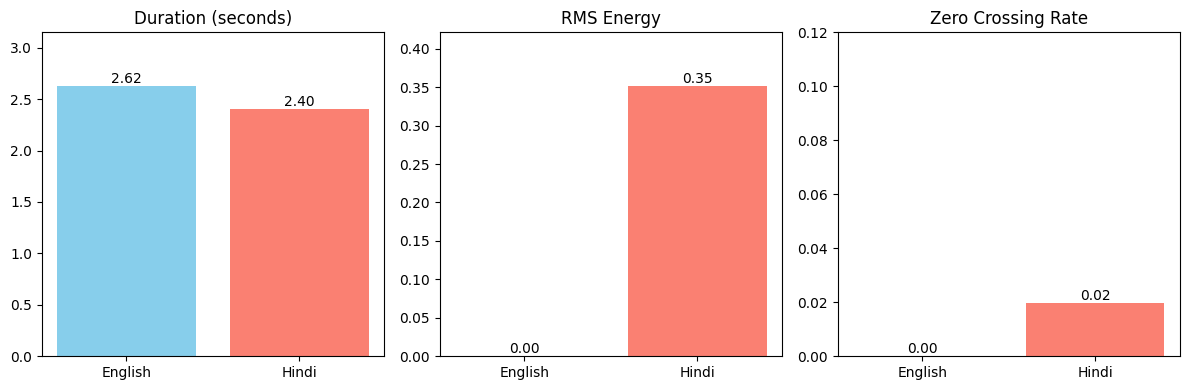

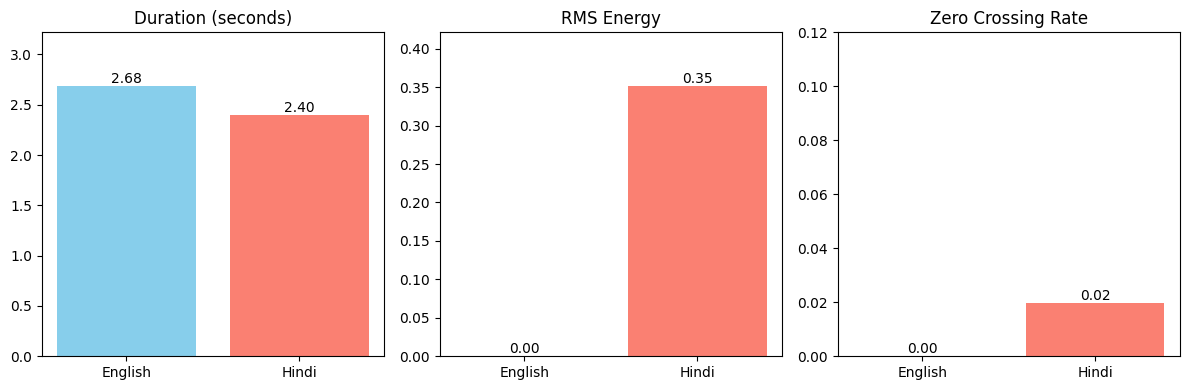

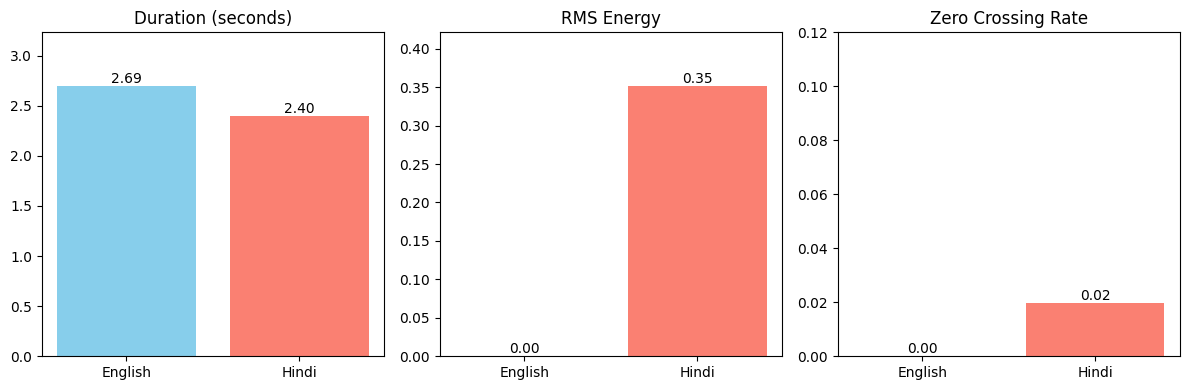

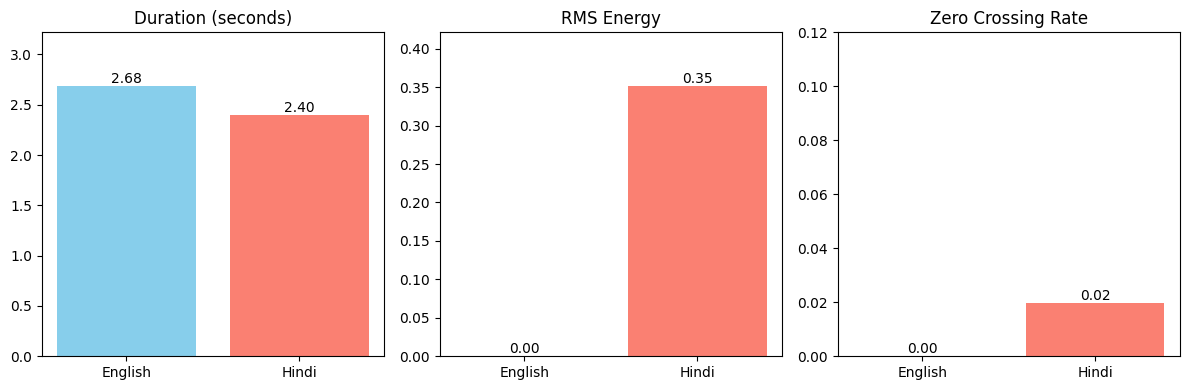

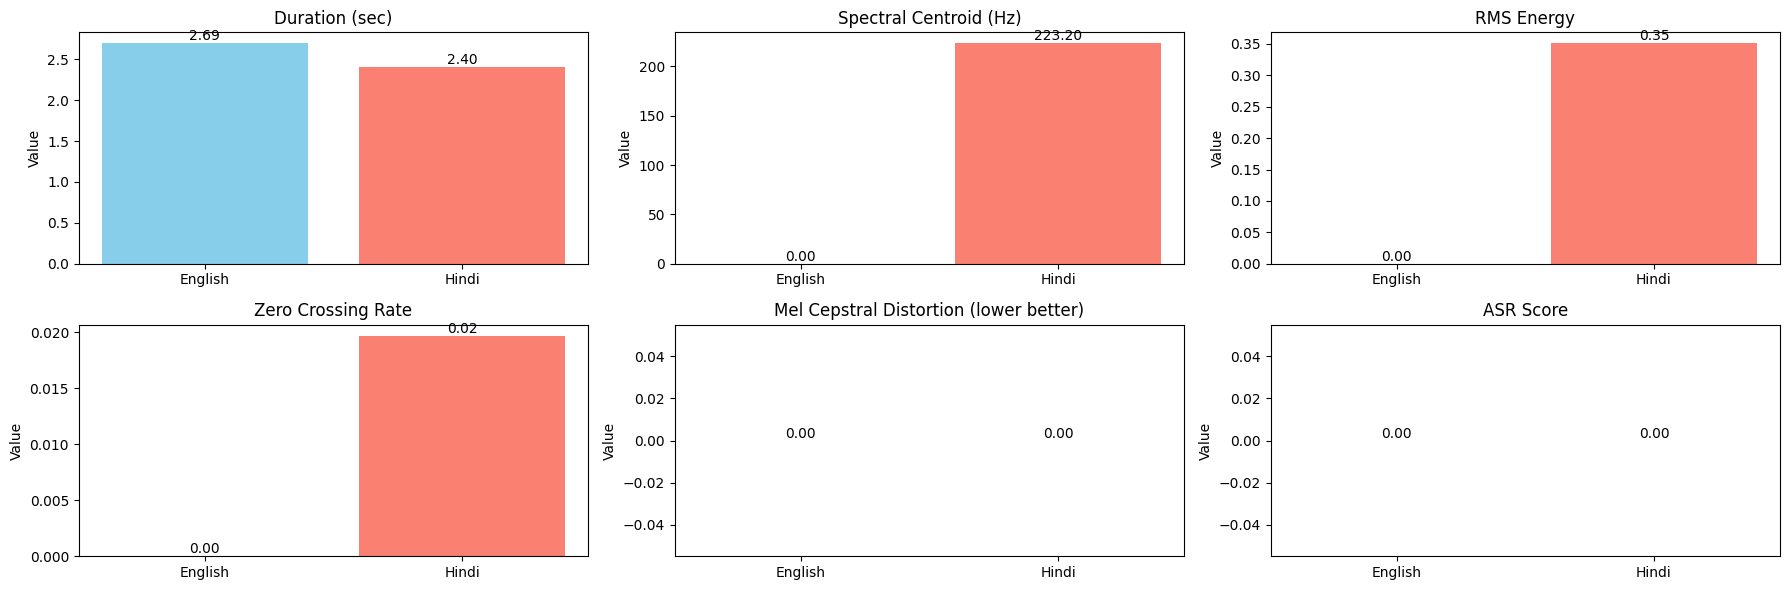

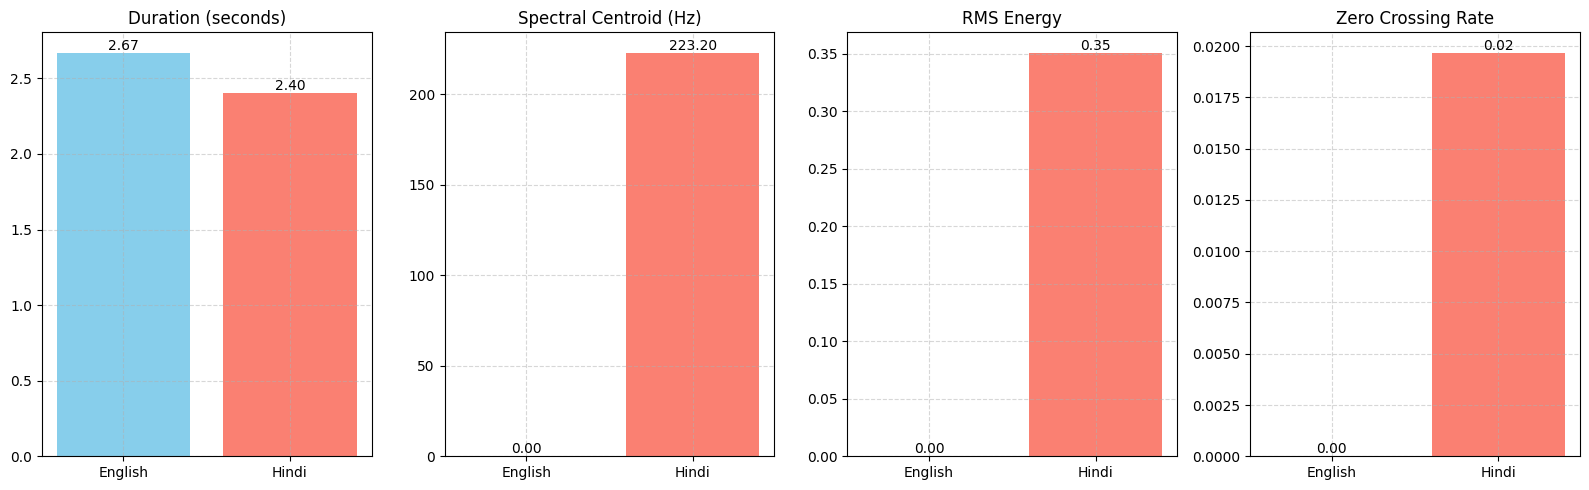

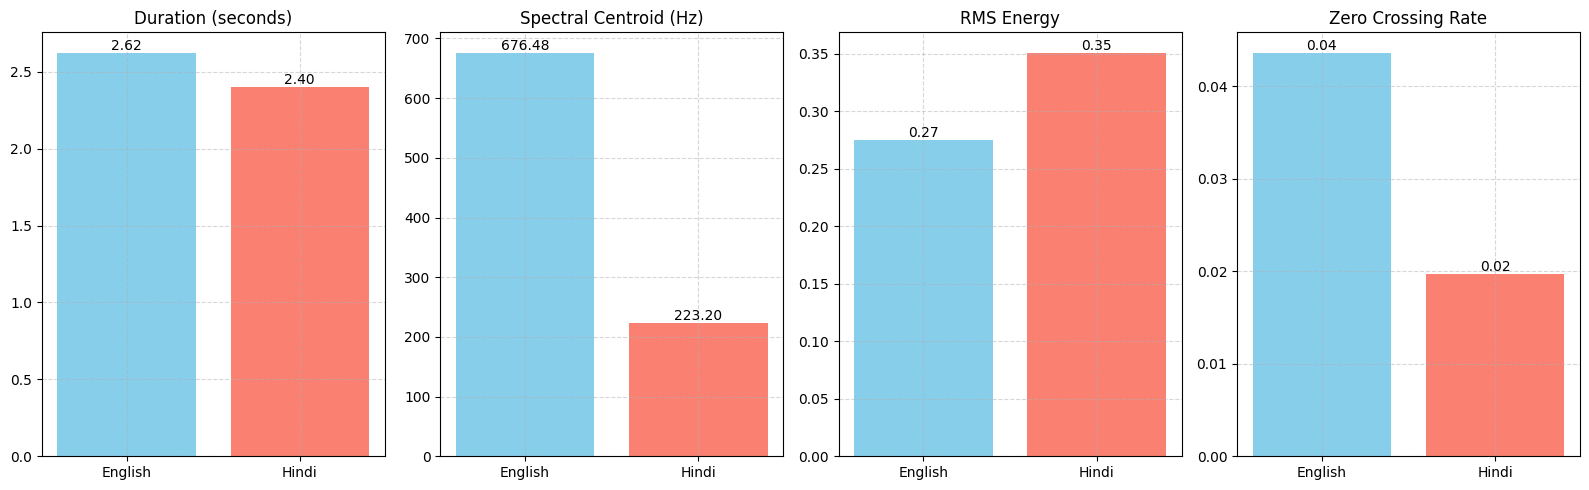

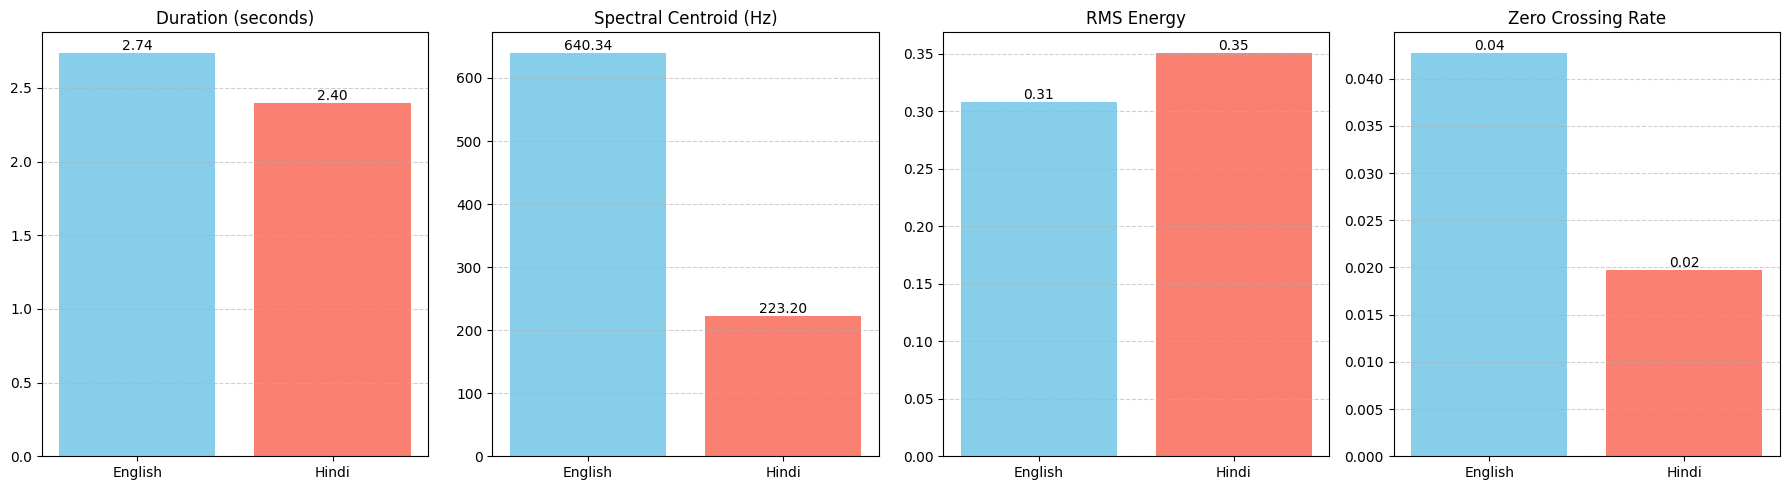

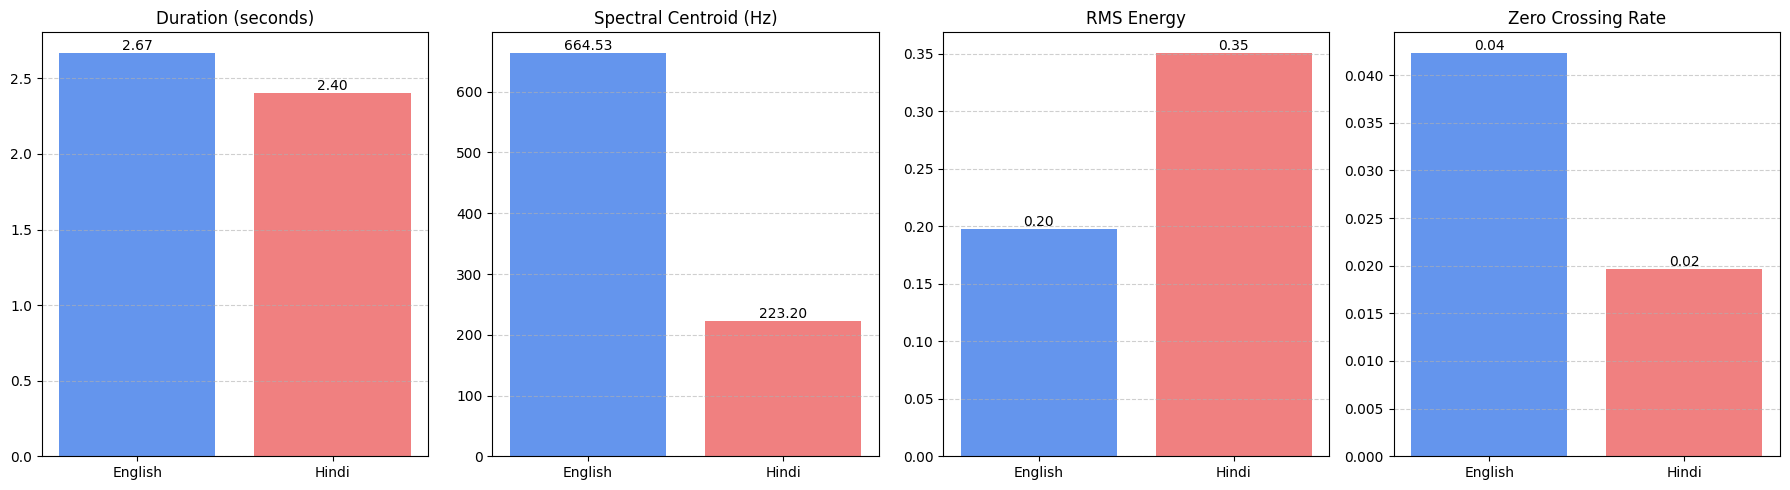

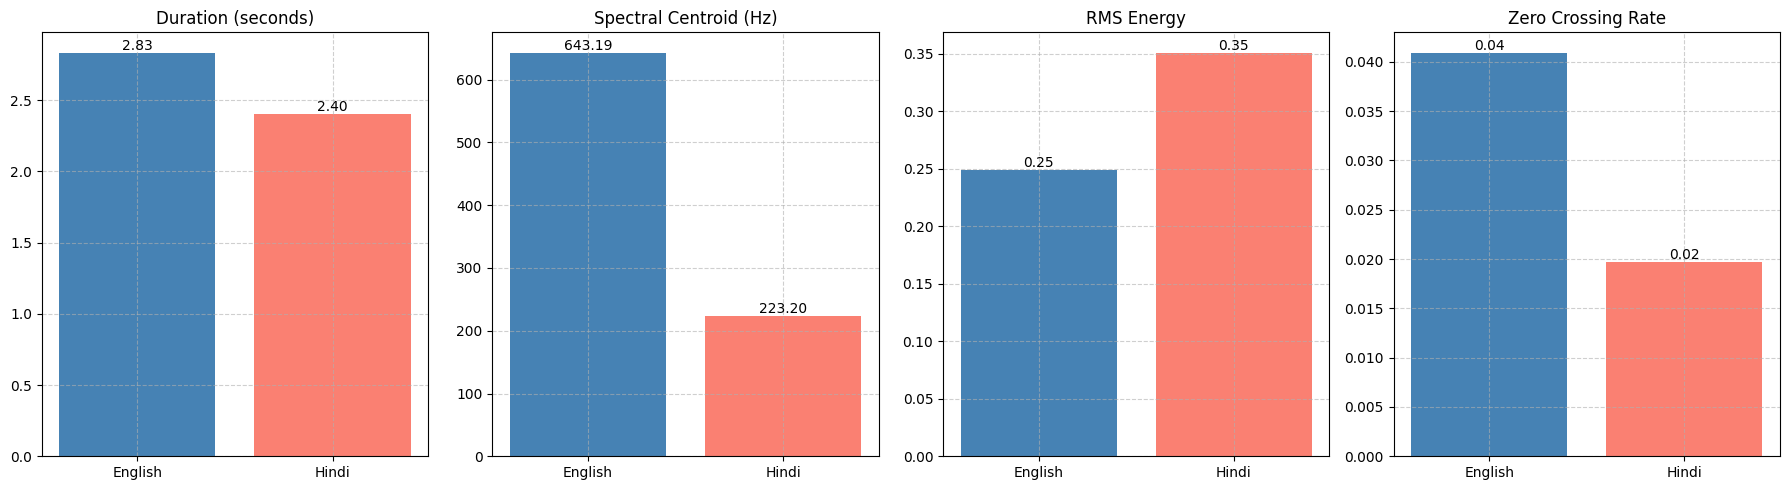

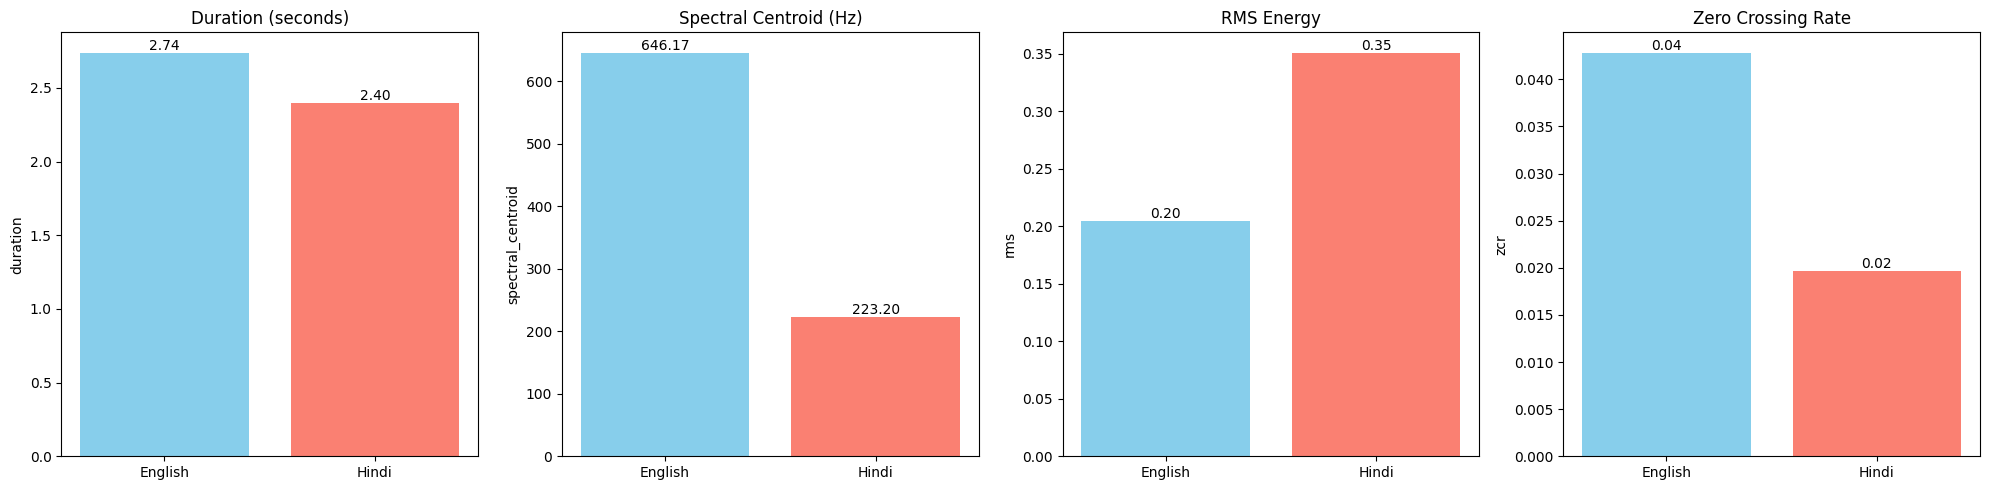

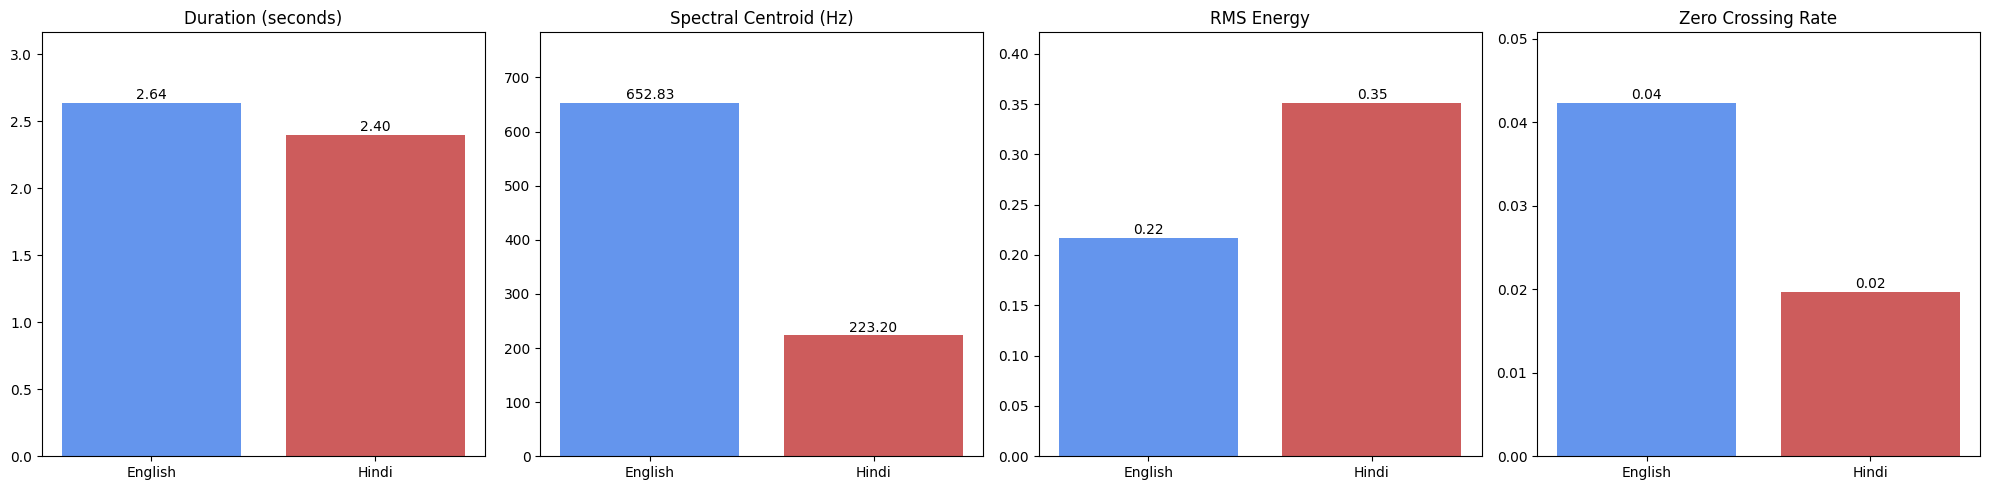

✅ Visualization complete!


In [62]:
eng_results, hindi_results = run_tts_comparison()
